In [1064]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [1065]:
pd.set_option('display.max_columns', None)

In [1066]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1067]:
root = "gdrive/My Drive/datathon data/"

In [1068]:
df = pd.read_csv("gdrive/My Drive/datathon data/statement_fact_20250325.csv")
df.head()

,current_account_nbr,billing_cycle_date,payment_hist_1_12_mths,return_check_cnt_2yr,return_check_cnt_last_mth,return_check_cnt_py,return_check_cnt_total,return_check_cnt_ytd,prev_balance
0,PKgK5204A2hwjCfA,2019-02-01,QQQQQQQQQQQQ,0,99,0,0,0,5152.54
1,iOOwMzkHGaPVUDVL,2018-09-20,IIIAZZZZZZZZ,0,99,0,0,0,311.71
2,jXzGZNN2VER7OPYX,2023-12-27,QQQQQIIIIQQQ,0,99,0,0,0,1482.13
3,LHeW9saekessmQ64,2024-05-16,IIIIIIA,0,99,0,0,0,1039.10
4,3F9novlPuaHD8tZz,2025-01-13,IIIIIIIIIIII,0,99,0,0,0,1392.79


## Modeling Quarterly Spending over Time

In [1069]:
import datetime
def datify(str):
  obj = datetime.datetime.strptime(str, "%Y-%m-%d")
  start = datetime.datetime(2015, 1, 1)
  return (obj - start).days

In [1070]:
df["since 2015"] = df["billing_cycle_date"].apply(datify)
df["quarter"] = pd.to_datetime(df["billing_cycle_date"]).dt.quarter
df["quarter"] = (df["billing_cycle_date"].apply(lambda x: x.split("-")[0]) + " Q" + df["quarter"].astype(str))
df.head()

,current_account_nbr,billing_cycle_date,payment_hist_1_12_mths,return_check_cnt_2yr,return_check_cnt_last_mth,return_check_cnt_py,return_check_cnt_total,return_check_cnt_ytd,prev_balance,since 2015,quarter
0,PKgK5204A2hwjCfA,2019-02-01,QQQQQQQQQQQQ,0,99,0,0,0,5152.54,1492,2019 Q1
1,iOOwMzkHGaPVUDVL,2018-09-20,IIIAZZZZZZZZ,0,99,0,0,0,311.71,1358,2018 Q3
2,jXzGZNN2VER7OPYX,2023-12-27,QQQQQIIIIQQQ,0,99,0,0,0,1482.13,3282,2023 Q4
3,LHeW9saekessmQ64,2024-05-16,IIIIIIA,0,99,0,0,0,1039.10,3423,2024 Q2
4,3F9novlPuaHD8tZz,2025-01-13,IIIIIIIIIIII,0,99,0,0,0,1392.79,3665,2025 Q1


In [1071]:
# Group data by Quarters
df_quarters = df[["quarter", "prev_balance"]].groupby("quarter").median().reset_index()
df_quarters

,quarter,prev_balance
0,2015 Q1,93.620
1,2015 Q2,159.170
2,2015 Q3,183.525
3,2015 Q4,188.730
4,2016 Q1,224.820
5,2016 Q2,198.300
6,2016 Q3,217.060
7,2016 Q4,244.750
8,2017 Q1,286.970
9,2017 Q2,261.800


In [1072]:
# Group data by Month
df["month year"] = df["billing_cycle_date"].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])
df_months = df[["month year", "prev_balance"]].groupby("month year").median().reset_index()
df_months.head()

,month year,prev_balance
0,2015-03,93.620
1,2015-04,149.370
2,2015-05,152.275
3,2015-06,184.060
4,2015-07,183.780


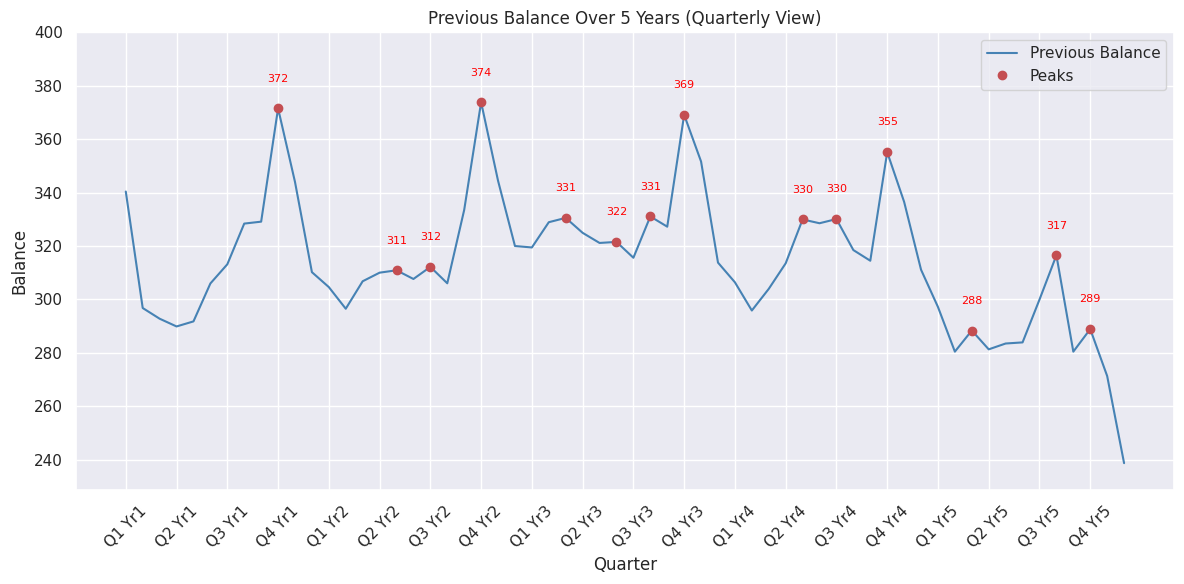

In [1073]:
import numpy as np
x = df_months.loc[61:120].index
y = df_months["prev_balance"].loc[61:120]

# Create quarter labels
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_labels = [f'{q} Yr{(i // 4) + 1}' for i, q in enumerate(quarters * 5)]  # 20 labels for 5 years

# Select x-axis ticks every 3 months (i.e. every quarter)
xtick_positions = x[::3]  # Every third month
xtick_labels = quarter_labels

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Previous Balance', color='steelblue')

# Highlight peaks
peak_indices = y[(y.shift(1) < y) & (y.shift(-1) < y)].index
plt.plot(peak_indices, y.loc[peak_indices], "ro", label="Peaks")

# Annotate peaks (optional)
for i in peak_indices:
    plt.annotate(f'{y[i]:.0f}', xy=(i, y[i]), xytext=(i, y[i]+10),
                 ha='center', fontsize=8, color='red')

    plt.ylim(bottom=min(y) - 10, top=400)

# Apply custom quarter labels to x-axis
plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45)

# Titles and labels
plt.title("Previous Balance Over 5 Years (Quarterly View)")
plt.xlabel("Quarter")
plt.ylabel("Balance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Creating the Regression Model

We will use a multiple Linear Regression to predict Q4 spending

### Step 1: Transpose and process the statement data to contain Quarterly data

In [1103]:
import datetime
df = pd.read_csv("gdrive/My Drive/datathon data/statement_fact_20250325.csv")
df["month"] = ((pd.to_datetime(df["billing_cycle_date"]) + pd.DateOffset(days=15)).dt.to_period("M").dt.to_timestamp()).astype(str)
df["month"] = (df["month"].apply(lambda x: x.split("-")[0]) + " " + df["month"].apply(lambda x: x.split("-")[1]))
df = df[["current_account_nbr", "prev_balance", "month"]]
df = df.groupby(["current_account_nbr", "month"]).sum(numeric_only=True).reset_index()
df_transpose = df.pivot(columns="month", index="current_account_nbr", values="prev_balance").reset_index()
df_transpose.columns.name = None
df_transpose

,current_account_nbr,2015 04,2015 05,2015 06,2015 07,2015 08,2015 09,2015 10,2015 11,2015 12,2016 01,2016 02,2016 03,2016 04,2016 05,2016 06,2016 07,2016 08,2016 09,2016 10,2016 11,2016 12,2017 01,2017 02,2017 03,2017 04,2017 05,2017 06,2017 07,2017 08,2017 09,2017 10,2017 11,2017 12,2018 01,2018 02,2018 03,2018 04,2018 05,2018 06,2018 07,2018 08,2018 09,2018 10,2018 11,2018 12,2019 01,2019 02,2019 03,2019 04,2019 05,2019 06,2019 07,2019 08,2019 09,2019 10,2019 11,2019 12,2020 01,2020 02,2020 03,2020 04,2020 05,2020 06,2020 07,2020 08,2020 09,2020 10,2020 11,2020 12,2021 01,2021 02,2021 03,2021 04,2021 05,2021 06,2021 07,2021 08,2021 09,2021 10,2021 11,2021 12,2022 01,2022 02,2022 03,2022 04,2022 05,2022 06,2022 07,2022 08,2022 09,2022 10,2022 11,2022 12,2023 01,2023 02,2023 03,2023 04,2023 05,2023 06,2023 07,2023 08,2023 09,2023 10,2023 11,2023 12,2024 01,2024 02,2024 03,2024 04,2024 05,2024 06,2024 07,2024 08,2024 09,2024 10,2024 11,2024 12,2025 01,2025 02,2025 03,2025 04
0,00iP5U82D8XwVQ9G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.00,17.37,12.59,120.43,94.58,86.40,120.15,134.98,229.42,427.37,436.12,479.60,494.55,695.66,872.78,1166.33,1253.52,1196.60,1234.72,1193.72,1278.87,1159.80,860.30,1198.26,1570.88,1521.20,1479.47,1912.12,1329.81,1275.50,1233.74,1383.35,1279.75,706.97,812.48,622.12,922.60,1211.18,1239.41,1321.06,1544.22,1354.78,1430.35,1227.66,930.51,772.24,530.03,439.21,474.35,218.77,174.28,139.25,107.95,58.25,163.61,262.74,475.62,246.19,405.76,545.83,78.67,265.32,421.16,499.20,616.01,661.86,474.19,NaN
1,00oyr3QppAzjLws4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.00,30.17,288.20,551.29,681.84,829.57,923.63,923.63,923.63,923.63,923.63,923.63,-20.00,441.49,425.66,400.39,530.98,1146.02,-62.40,-62.40,-62.40,-62.40,-20.00,55.40,123.69,23.89,451.43,784.95,1198.02,1361.45,1501.40,1745.83,1732.32,745.68,836.99,388.44,345.27,322.61,299.02,203.74,177.74,151.32,246.23,221.16,195.57,169.58,169.58,-20.00,38.84,250.54,365.30,672.36,780.80,1040.12,1096.07,1108.04,1096.95,1083.83,1073.24,1422.16,1527.67,1515.55,1544.88,1580.16,1561.95,1546.49,1555.63,1537.92,1667.43,1841.96,1823.16,2213.71,2188.46,2170.36,2146.26,2125.19,2101.16,2080.12,2058.62,2033.78,2016.78,2254.14,2238.14,2233.39,2206.66,2253.61,2220.85,2380.42,2419.32,2479.43,2602.25,2580.68,2553.51,2523.02,2690.28,2638.38,2635.01,NaN
2,01SEhQXHbPJRc1Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,NaN
3,01wbqz3obYPYxLvR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-20.00,-20.00,-20.00,-20.00,NaN
4,020qpQKv0isIguXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [1104]:
cols = list(df_transpose.columns)
d = {}
for i in range(1, len(cols), 3):
    columns = cols[i:i+3]
    if columns[0].split(" ")[1] == "04":
        s = "Q2_" + columns[0].split(" ")[0]
    elif columns[0].split(" ")[1] == "07":
        s = "Q3_" + columns[0].split(" ")[0]
    elif columns[0].split(" ")[1] == "10":
        s = "Q4_" + columns[0].split(" ")[0]
    else:
        s = "Q1_" + columns[0].split(" ")[0]
    d[s] = columns
for i in d.keys():
    df_transpose[i] = 0
    for j in range(len(d[i])):
        df_transpose[i] = df_transpose[i] + df_transpose[d[i][j]]
    df_transpose = df_transpose.drop(columns=d[i])

In [1105]:
df_transpose

,current_account_nbr,Q2_2015,Q3_2015,Q4_2015,Q1_2016,Q2_2016,Q3_2016,Q4_2016,Q1_2017,Q2_2017,Q3_2017,Q4_2017,Q1_2018,Q2_2018,Q3_2018,Q4_2018,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Q3_2021,Q4_2021,Q1_2022,Q2_2022,Q3_2022,Q4_2022,Q1_2023,Q2_2023,Q3_2023,Q4_2023,Q1_2024,Q2_2024,Q3_2024,Q4_2024,Q1_2025,Q2_2025
0,00iP5U82D8XwVQ9G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.39,301.13,791.77,1410.27,2734.77,3684.84,3632.39,3629.44,4912.79,3839.05,3370.07,2357.20,3771.65,4329.35,2930.41,1443.59,532.30,329.81,984.55,1030.26,1185.68,1752.06,NaN
1,00oyr3QppAzjLws4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,869.66,2435.04,2770.89,1827.26,1267.54,1614.60,-187.20,159.09,1260.27,4060.87,4223.83,1570.70,825.37,575.29,586.31,188.42,1288.20,2916.99,3288.82,4023.07,4640.59,4664.07,5047.31,6225.33,6441.81,6239.90,6304.70,6678.19,6854.88,7501.00,7657.21,7963.67,NaN
2,01SEhQXHbPJRc1Go,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00,NaN
3,01wbqz3obYPYxLvR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60.00,NaN
4,020qpQKv0isIguXC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3790.00,5069.00,4086.00,1640.00,1440.00,1440.00,1440.00,1440.00,480.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,zzBy2qNM78aRV580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,777.13,851.03,677.79,215.03,1007.15,1870.38,16.97,2632.39,3611.98,1198.06,269.15
17609,zzEuUBBmvGiVnabb,NaN,NaN,NaN,NaN,-171.66,1852.68,3053.24,2432.02,2198.09,1887.87,1843.03,9704.53,10118.20,4936.61,4889.19,1470.83,6120.99,10844.73,12150.56,201.81,1900.10,447.01,1269.02,2142.71,2647.16,4341.66,2752.86,13517.51,14968.78,4723.58,6530.01,2877.24,319.12,123.06,-27.62,3030.37,1009.91,1247.98,308.82,4437.64,NaN
17610,zzR9PvG7dY9u5iHU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.60
17611,zzXGgGu6ysGwGH1J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Create and filter rams_batch and account_dim data for their features

In [1106]:
account_dim = pd.read_csv(root+"account_dim_20250325.csv")
account_dim = account_dim[["current_account_nbr", "open_date", "employee_code", "account_card_type"]]
account_dim.head()

,current_account_nbr,open_date,employee_code,account_card_type
0,nTgalbpd5Rsol7CA,2020-07-17T00:00:00.000-04:00,NaN,DUAL CARD
1,xYaLrD9IvmbVl1PB,2024-07-24T00:00:00.000-04:00,NaN,DUAL CARD
2,JM78WNziiRWgmL8e,2024-05-05T00:00:00.000-04:00,NaN,PLCC
3,bv4NLVhWTGCf8KgC,2024-07-28T00:00:00.000-04:00,NaN,PLCC
4,nrXceQabYIHo31lp,2024-09-15T00:00:00.000-04:00,NaN,PLCC


In [1107]:
# prompt: convert account_dim["open_date"] to years (including decimals) from open_date to March 25, 2025. open_date is a string object

import datetime

# Assuming 'account_dim' DataFrame is already loaded as shown in your provided code

# Convert 'open_date' to datetime objects
account_dim["open_date"] = account_dim["open_date"].str[0:10]
account_dim['open_date'] = pd.to_datetime(account_dim['open_date'])

# Define the end date
end_date = datetime.datetime(2025, 3, 25)

# Calculate the difference in years (including decimals)
account_dim['years_since_open'] = (end_date - account_dim['open_date']).dt.days / 365.25


In [1108]:
# prompt: Change all NaN values in account_dim["employee_code"] to N

# Replace NaN values in 'employee_code' with 'N'
account_dim["employee_code"] = account_dim["employee_code"].fillna("N")

In [1109]:
account_dim.head()

,current_account_nbr,open_date,employee_code,account_card_type,years_since_open
0,nTgalbpd5Rsol7CA,2020-07-17,N,DUAL CARD,4.687201
1,xYaLrD9IvmbVl1PB,2024-07-24,N,DUAL CARD,0.668036
2,JM78WNziiRWgmL8e,2024-05-05,N,PLCC,0.887064
3,bv4NLVhWTGCf8KgC,2024-07-28,N,PLCC,0.657084
4,nrXceQabYIHo31lp,2024-09-15,N,PLCC,0.522930


## Step 3: Create training data: create statement data, then merge account_dim

In [1110]:
def create_training_data(df, year):
  l = ["current_account_nbr", "Q1_"+str(year-1),"Q2_"+str(year-1),"Q3_"+str(year-1),"Q4_"+str(year-1),"Q1_"+str(year),"Q4_"+str(year)]
  df_test = df[l][df[l].notnull().all(axis=1)]
  df_test = df_test.rename(columns={"Q1_"+str(year-1):"Q1_y0", "Q2_"+str(year-1):"Q2_y0", "Q3_"+str(year-1):"Q3_y0", "Q4_"+str(year-1):"Q4_y0", "Q1_"+str(year):"Q1_y1", "Q4_"+str(year):"Q4_y1"})
  l = ["current_account_nbr", "Q1_y0","Q2_y0","Q3_y0","Q4_y0","Q1_y1","Q4_y1"]
  for i in l:
    df_test = df_test[df_test[i]!=0]
  return df_test, l

In [1111]:
year = 2024
df_test, l = create_training_data(df_transpose, year)
df_test.head()

,current_account_nbr,Q1_y0,Q2_y0,Q3_y0,Q4_y0,Q1_y1,Q4_y1
0,00iP5U82D8XwVQ9G,4329.35,2930.41,1443.59,532.30,329.81,1185.68
1,00oyr3QppAzjLws4,6225.33,6441.81,6239.90,6304.70,6678.19,7657.21
5,02BQJJ6SF1G2qLBn,938.07,530.07,479.07,479.07,479.07,479.07
8,033o9yHYen3xoz6k,5529.54,3761.52,4133.91,6688.80,4971.24,6470.07
12,03n28YA8ljfM9tor,101.25,101.25,101.25,101.25,611.04,442.91


In [1112]:
df_test["percent_increase"]  = (df_test[l[1]] - df_test[l[4]]) / df_test[l[1]]

In [1113]:
# merge account_dim
df_test = pd.merge(left=df_test, right=account_dim, how="inner", on="current_account_nbr")
df_test = df_test.drop(columns=["open_date"])
df_test.head()

,current_account_nbr,Q1_y0,Q2_y0,Q3_y0,Q4_y0,Q1_y1,Q4_y1,percent_increase,employee_code,account_card_type,years_since_open
0,00iP5U82D8XwVQ9G,4329.35,2930.41,1443.59,532.30,329.81,1185.68,0.877049,N,PLCC,5.631759
1,00oyr3QppAzjLws4,6225.33,6441.81,6239.90,6304.70,6678.19,7657.21,-0.012750,N,PLCC,8.093087
2,02BQJJ6SF1G2qLBn,938.07,530.07,479.07,479.07,479.07,479.07,0.489303,N,DUAL CARD,6.962355
3,033o9yHYen3xoz6k,5529.54,3761.52,4133.91,6688.80,4971.24,6470.07,-0.209649,H,DUAL CARD,8.553046
4,03n28YA8ljfM9tor,101.25,101.25,101.25,101.25,611.04,442.91,0.000000,N,PLCC,4.251882


## Step 4: Train the model!

In [1114]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_test, test_size=0.2, random_state=42)

In [1115]:
# use one-hot encoding to quantify and find correlations
oh_encoded = df_test[list(df_test.columns[1:])]
oh_encoded = pd.get_dummies(oh_encoded)
features = list(oh_encoded.columns)
oh_encoded.head()
oh_encoded.corr()

,Q1_y0,Q2_y0,Q3_y0,Q4_y0,Q1_y1,Q4_y1,percent_increase,years_since_open,employee_code_H,employee_code_N,employee_code_Y,account_card_type_DUAL CARD,account_card_type_PLCC
Q1_y0,1.000000,0.903084,0.855719,0.813426,0.780809,0.700933,0.008679,0.012948,0.366943,-0.366419,-0.008559,0.201832,-0.201832
Q2_y0,0.903084,1.000000,0.914767,0.849091,0.801722,0.716942,0.007153,0.006377,0.344656,-0.344160,-0.008134,0.193081,-0.193081
Q3_y0,0.855719,0.914767,1.000000,0.910078,0.850062,0.757191,0.004505,0.017783,0.372190,-0.371680,-0.008159,0.213603,-0.213603
Q4_y0,0.813426,0.849091,0.910078,1.000000,0.912503,0.793008,-0.022307,0.017210,0.377030,-0.376501,-0.008565,0.221880,-0.221880
Q1_y1,0.780809,0.801722,0.850062,0.912503,1.000000,0.829455,-0.010875,0.016537,0.382807,-0.382285,-0.008316,0.229730,-0.229730
Q4_y1,0.700933,0.716942,0.757191,0.793008,0.829455,1.000000,0.004693,0.017840,0.369038,-0.368541,-0.007877,0.214472,-0.214472
percent_increase,0.008679,0.007153,0.004505,-0.022307,-0.010875,0.004693,1.000000,0.011025,0.007391,-0.007397,0.000235,-0.015605,0.015605
years_since_open,0.012948,0.006377,0.017783,0.017210,0.016537,0.017840,0.011025,1.000000,0.157073,-0.160057,0.076237,-0.010545,0.010545
employee_code_H,0.366943,0.344656,0.372190,0.377030,0.382807,0.369038,0.007391,0.157073,1.000000,-0.999193,-0.007866,0.538380,-0.538380
employee_code_N,-0.366419,-0.344160,-0.371680,-0.376501,-0.382285,-0.368541,-0.007397,-0.160057,-0.999193,1.000000,-0.032297,-0.538815,0.538815


In [1116]:
import statsmodels.formula.api as smf

# create formula
formula = l[-1]+" ~ "
for i in range(1, len(l)-1):
  formula = formula + l[i] + " + "
formula += "years_since_open + employee_code + account_card_type + percent_increase"
interaction_term = l[-2] + ":" + l[-3]
formula += " + " + interaction_term
print(interaction_term)
print(formula)

# train model
results = smf.ols(formula=formula, data=train).fit()
results.summary()

Q1_y1:Q4_y0
Q4_y1 ~ Q1_y0 + Q2_y0 + Q3_y0 + Q4_y0 + Q1_y1 + years_since_open + employee_code + account_card_type + percent_increase + Q1_y1:Q4_y0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Q4_y1   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1412.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:11:22   Log-Likelihood:                -60001.
No. Observations:                6294   AIC:                         1.200e+05
Df Residuals:                    6282   BIC:                         1.201e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   581.4798    143.358      4.056      0.000     300.448     862.511
employee_code[T.N]         -486.8574    138.901     -3.505      0.000    -759.151    -214.563
employee_code[T.Y]         -640.1728   2375.103     -0.270      0.788   -5296.185    4015.840
account_card_type[T.PLCC]    10.6539    101.396      0.105      0.916    -188.117     209.424
Q1_y0                         0.0210      0.016      1.304      0.192      -0.011       0.053
Q2_y0                         0.0226      0.021      1.100      0.271      -0.018       0.063
Q3_y0                         0.0554      0.020      2.722      0.006       0.016       0.095
Q4_y0                         0.2270      0.022     10.290      0.000       0.184       0.270
Q1_y1                         0.5960      0.018     32.750      0.000       0.560       0.632
years_since_open              3.5740      6.110      0.585      0.559      -8.404      15.552
percent_increase              0.4944      0.198      2.499      0.012       0.107       0.882
Q1_y1:Q4_y0               -3.442e-06   3.45e-07     -9.971      0.000   -4.12e-06   -2.77e-06
==============================================================================
Omnibus:                     2595.963   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190592.267
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                      29.868   Cond. No.                     1.30e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1117]:
 test["pred"] = results.predict(test)
 rmse(test["Q4_y1"], test["pred"])

3321.7198129404906

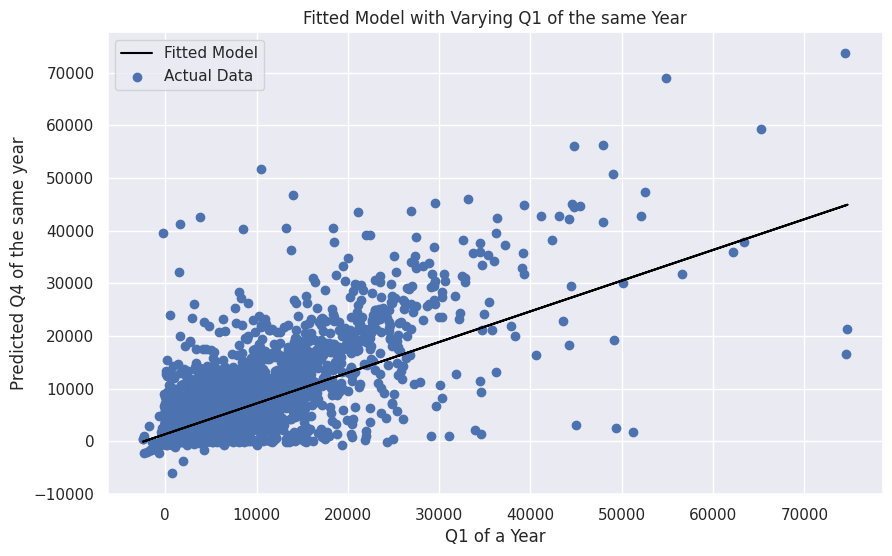

In [1118]:
# prompt: prompt: Plot the fitted model with every independent variable as constant except for "Q1_y1". employee_code and account_card_type are categorical variables

import matplotlib.pyplot as plt

# Assuming 'results' is your fitted model and 'df_test' is your data
# Create a copy of df_test to avoid modifying the original
df_plot = df_test.copy()

# Set all independent variables to their mean except for 'Q1_y1'
for col in ["Q1_y0", "Q2_y0", "Q3_y0", "Q4_y0", "years_since_open", "percent_increase"]:
    df_plot[col] = df_plot[col].mean()

# Handle categorical variables
for col in ["employee_code", "account_card_type"]:
    # Find the mode for each categorical variable
    mode_val = df_plot[col].mode()[0]  # Get the most frequent value
    df_plot[col] = mode_val # set all values to the mode

# Predict Q4_y1 based on modified df_plot
df_plot["Q4_predicted"] = results.predict(df_plot)


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_plot["Q1_y1"], df_plot["Q4_predicted"], label="Fitted Model", color="0")  # Plot Q1 vs predictions
plt.scatter(df_test["Q1_y1"], df_test["Q4_y1"], label="Actual Data")  # Plot actual data points
plt.xlabel("Q1 of a Year")
plt.ylabel("Predicted Q4 of the same year")
plt.title("Fitted Model with Varying Q1 of the same Year")
plt.legend()
plt.grid(True)
plt.show()


# Part 5: Predicting 2025

Finally, we have predicted Q4 spending for 2025

In [1119]:
l = ["current_account_nbr", "Q1_2024","Q2_2024","Q3_2024","Q4_2024","Q1_2025"]
df = df_transpose[l][df_transpose[l].notnull().all(axis=1)]
for i in l:
  df = df[df[i]!=0]
df = df.rename(columns={"Q1_2024":"Q1_y0", "Q2_2024":"Q2_y0", "Q3_2024":"Q3_y0", "Q4_2024":"Q4_y0", "Q1_2025":"Q1_y1"})
df = pd.merge(left=df, right=account_dim, how="inner", on="current_account_nbr")
df.head()

,current_account_nbr,Q1_y0,Q2_y0,Q3_y0,Q4_y0,Q1_y1,open_date,employee_code,account_card_type,years_since_open
0,00iP5U82D8XwVQ9G,329.81,984.55,1030.26,1185.68,1752.06,2019-08-07,N,PLCC,5.631759
1,00oyr3QppAzjLws4,6678.19,6854.88,7501.00,7657.21,7963.67,2017-02-19,N,PLCC,8.093087
2,01SEhQXHbPJRc1Go,147.00,147.00,147.00,147.00,147.00,2013-07-26,N,PLCC,11.663244
3,020qpQKv0isIguXC,1640.00,1440.00,1440.00,1440.00,1440.00,2023-03-16,N,PLCC,2.026010
4,02BQJJ6SF1G2qLBn,479.07,479.07,479.07,479.07,479.07,2018-04-08,N,DUAL CARD,6.962355


In [1120]:
df["percent_increase"]  = (df["Q1_y0"] - df["Q4_y0"]) / df["Q1_y0"]

In [1121]:
df["Q4_2025"] = results.predict(df)

In [1122]:
df

,current_account_nbr,Q1_y0,Q2_y0,Q3_y0,Q4_y0,Q1_y1,open_date,employee_code,account_card_type,years_since_open,percent_increase,Q4_2025
0,00iP5U82D8XwVQ9G,329.81,984.55,1030.26,1185.68,1752.06,2019-08-07,N,PLCC,5.631759,-2.595040,1516.630852
1,00oyr3QppAzjLws4,6678.19,6854.88,7501.00,7657.21,7963.67,2017-02-19,N,PLCC,8.093087,-0.146600,7119.571471
2,01SEhQXHbPJRc1Go,147.00,147.00,147.00,147.00,147.00,2013-07-26,N,PLCC,11.663244,0.000000,282.421665
3,020qpQKv0isIguXC,1640.00,1440.00,1440.00,1440.00,1440.00,2023-03-16,N,PLCC,2.026010,0.121951,1437.325104
4,02BQJJ6SF1G2qLBn,479.07,479.07,479.07,479.07,479.07,2018-04-08,N,DUAL CARD,6.962355,0.000000,560.422029
...,...,...,...,...,...,...,...,...,...,...,...,...
10600,zyJE2tL88DrIQcAE,-92.19,-92.19,-92.19,-92.19,-92.19,2023-04-27,N,PLCC,1.911020,-0.000000,27.077295
10601,zyj6GW8oQ4NT0iSx,91.21,121.71,121.71,121.71,121.71,2023-08-28,N,PLCC,1.574264,-0.334393,222.264328
10602,zzBy2qNM78aRV580,1870.38,16.97,2632.39,3611.98,1198.06,2018-12-17,N,DUAL CARD,6.269678,-0.931148,1821.107072
10603,zzEuUBBmvGiVnabb,3030.37,1009.91,1247.98,308.82,4437.64,2016-04-03,H,DUAL CARD,8.974675,0.898092,3479.802552


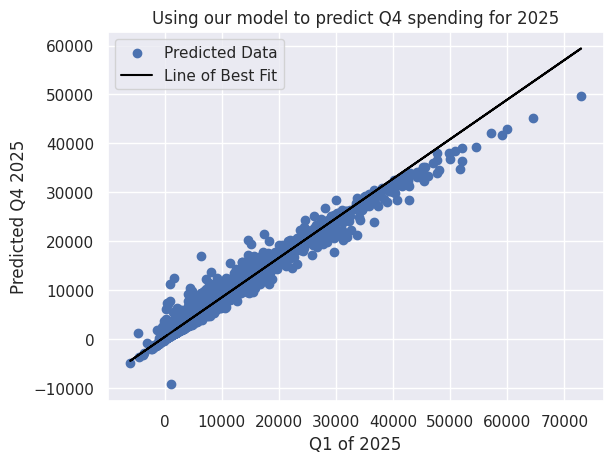

In [1123]:
m, b = np.polyfit(df["Q1_y1"], df["Q4_2025"], 1)
best_fit = m*df["Q1_y1"] + b

plt.scatter(df["Q1_y1"], df["Q4_2025"], label="Predicted Data")
plt.plot(df["Q1_y1"], best_fit, color='0', label="Line of Best Fit")
plt.xlabel("Q1 of 2025")
plt.ylabel("Predicted Q4 2025")
plt.title("Using our model to predict Q4 spending for 2025")
plt.legend()
plt.grid(True)
plt.show()

In [1124]:
# Percent Increase from Q1 2025 to Q4 2025

inc = 100 *(df["Q4_2025"]-df["Q1_y1"]).median() / df["Q1_y1"].median()
print("Our estimated percent increase in Q4 spending will be", round(inc, 2), "%.")

Our estimated percent increase in Q4 spending will be 10.22 %.


In [1126]:
a = df["Q1_y1"].median()
b = df["Q4_2025"].median()

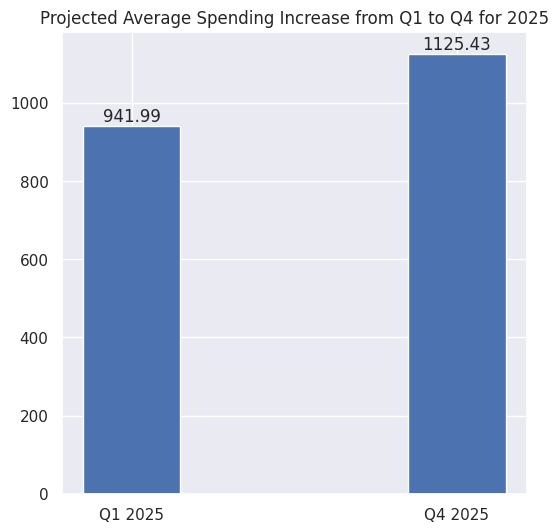

In [1127]:
plt.figure(figsize=(6, 6))
w = plt.bar(x=["Q1 2025", "Q4 2025"], height=[a, b], width=0.3, align="center")
plt.bar_label(w)
plt.title("Projected Average Spending Increase from Q1 to Q4 for 2025")
plt.show()